## Clasificación de imágenes con el dataset CIFAR10

![texto alternativo](https://datasmarts.net/es/wp-content/uploads/2019/09/cifar10_plot.png)


https://www.kaggle.com/code/cedricb/mnist-cnn-grid-search-data-augmentation/notebook

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

In [36]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(np.unique(y_train,return_counts=True),'values of each class')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64)) values of each class


In [37]:
x_train = x_train[np.array(y_train<3).ravel()]
y_train = y_train[np.array(y_train<3).ravel()]

x_test = x_test[np.array(y_test<3).ravel()]
y_test = y_test[np.array(y_test<3).ravel()]

In [38]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(np.unique(y_train,return_counts=True),'values of each class')

x_train shape: (15000, 32, 32, 3)
15000 train samples
3000 test samples
(array([0, 1, 2], dtype=uint8), array([5000, 5000, 5000], dtype=int64)) values of each class


### Do it yourself: entrena una red neuronal convolucional para clasificar las imágenes

Digit class: [1]


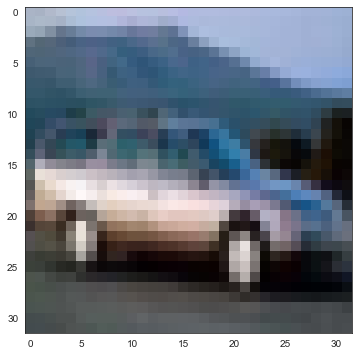

In [39]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], 'gray')

print("Digit class:", y_train[0])

In [40]:
# Aleatorio
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=42)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, y_val = train_test_split (x_train, y_train, test_size = 0.2)

In [51]:
Y_train.shape

(12000, 1)

In [27]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# keras import
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# data augmentation
from keras.preprocessing.image import ImageDataGenerator

# visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#set figure size
plt.rcParams['figure.figsize'] = 12, 6
sns.set_style('white')

# others
from random import randrange
from time import time


n_epochs = 30 # 30 
n_epochs_cv = 10 # 10  # reduce number of epochs for cross validation for performance reason

n_cv = 3
validation_ratio = 0.10

In [60]:
# function to create the model for Keras wrapper to scikit learn
# we will optimize the type of pooling layer (max or average) and the activation function of the 2nd and 3rd convolution layers 
def create_cnn_model(pool_type='max', conv_activation='relu', dropout_rate=0.10):
    # create model
    model = Sequential()
    
    # first layer: convolution
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) 
        
    # second series of layers: convolution, pooling, and dropout
    model.add(Conv2D(32, kernel_size=(3, 3), activation=conv_activation))  
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
    
    # third series of layers: convolution, pooling, and dropout    
    model.add(Conv2D(64, kernel_size=(3, 3), activation=conv_activation))   # 32   
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
      
    # fourth series
    model.add(Flatten())         
    model.add(Dense(64, activation=conv_activation)) # 64
    # add a dropout layer if rate is not null    
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate)) 
        
    model.add(Dense(3, activation='softmax'))
    
    # Compile model
    model.compile( 
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model

cnn = create_cnn_model()

cnn.compile(
  optimizer='adam',
  loss='categorical_crossentropy',  
  metrics=['accuracy'],
)

In [61]:
X_train.shape, Y_train.shape

((12000, 32, 32, 3), (12000, 1))

In [62]:
# Train the default CNN model

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=5, restore_best_weights=True)

history = cnn.fit(
    X_train,
    to_categorical(Y_train),
    epochs=n_epochs,  
    validation_data=(X_val, to_categorical(y_val)), 
    batch_size=32,
    callbacks = [early_stop]
)

Epoch 1/30
375/375 [==============================] - 11s 27ms/step - loss: 1.4950 - accuracy: 0.6177 - val_loss: 0.6312 - val_accuracy: 0.7497
Epoch 2/30
375/375 [==============================] - 10s 27ms/step - loss: 0.5990 - accuracy: 0.7342 - val_loss: 0.4908 - val_accuracy: 0.8130
Epoch 3/30
375/375 [==============================] - 10s 27ms/step - loss: 0.5351 - accuracy: 0.7665 - val_loss: 0.4579 - val_accuracy: 0.8250
Epoch 4/30
375/375 [==============================] - 10s 27ms/step - loss: 0.4773 - accuracy: 0.8002 - val_loss: 0.4175 - val_accuracy: 0.8463
Epoch 5/30
375/375 [==============================] - 10s 27ms/step - loss: 0.4276 - accuracy: 0.8282 - val_loss: 0.3879 - val_accuracy: 0.8610
Epoch 6/30
375/375 [==============================] - 10s 27ms/step - loss: 0.3837 - accuracy: 0.8488 - val_loss: 0.3797 - val_accuracy: 0.8610
Epoch 7/30
375/375 [==============================] - 10s 26ms/step - loss: 0.3373 - accuracy: 0.8668 - val_loss: 0.3622 - val_accuracy:

In [ ]:
# optimize model 
start = time()

# create model
model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'pool_type': ['max', 'average'],
    'conv_activation': ['sigmoid', 'tanh'],    
    'epochs': [n_epochs_cv],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)
grid_result = grid.fit(X_train, to_categorical(Y_train))

# summarize results
print('time for grid search = {:.0f} sec'.format(time()-start))
display_cv_results(grid_result)

In [ ]:
# define function to display the results of the grid search
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))    

In [ ]:
display_cv_results(grid_result)

In [57]:
# optimize parameters of the fit method 
cnn_model = create_cnn_model(pool_type = grid_result.best_params_['pool_type'],
                             conv_activation = grid_result.best_params_['conv_activation'], 
                            dropout_rate=0.0)

#define early stop on the accuracy as this is the metric we want to improve
early_stop = EarlyStopping(monitor = 'accuracy', mode = 'max', patience=5, restore_best_weights=True)
history = cnn_model.fit_generator(datagen.flow(X_train,to_categorical(y_train), batch_size=32),
                                  epochs = n_epochs, 
                                  validation_data = (X_val,to_categorical(y_val)),
                                  verbose = 1, 
                                  steps_per_epoch = X_train.shape[0] / 32,
                                  callbacks = [early_stop])

# plot accuracy on training and validation data
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

NameError: name 'datagen' is not defined